<a href="https://colab.research.google.com/github/anbarasi302007-oss/github/blob/main/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [ ]:
# Load dataset
df = pd.read_csv('retail_sales_dataset.csv')

# View first 5 rows
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Dataset shape
df.shape

# Dataset info
df.info()

# Column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [ ]:
# Check missing values
df.isnull().sum()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert Date column to datetime (change column name if needed)
df['Date'] = pd.to_datetime(df['Date'])

# Check again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [ ]:
print("Mean Sales:", df['Total Amount'].mean())
print("Median Sales:", df['Total Amount'].median())
print("Mode Sales:", df['Total Amount'].mode()[0])
print("Standard Deviation:", df['Total Amount'].std())

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation: 559.997631555123


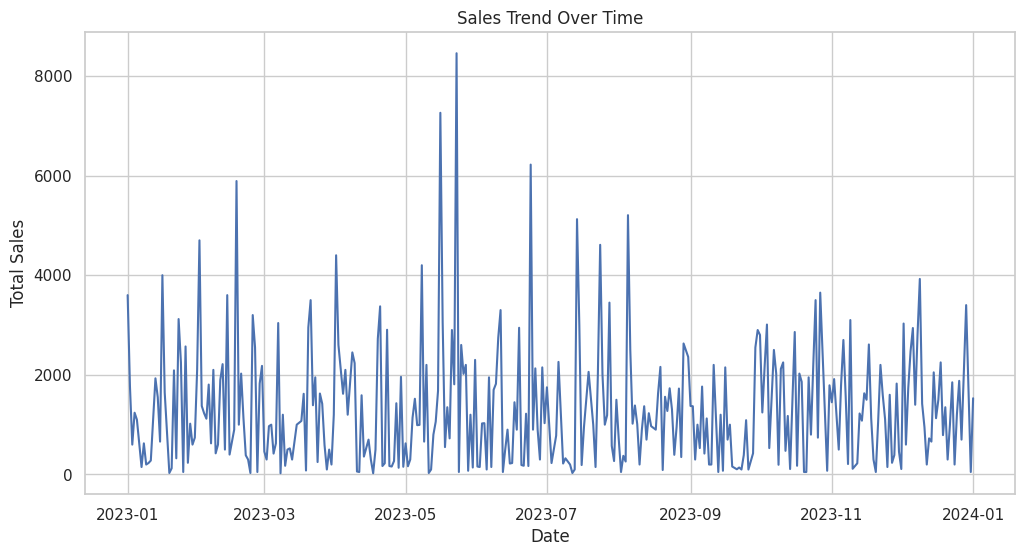

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

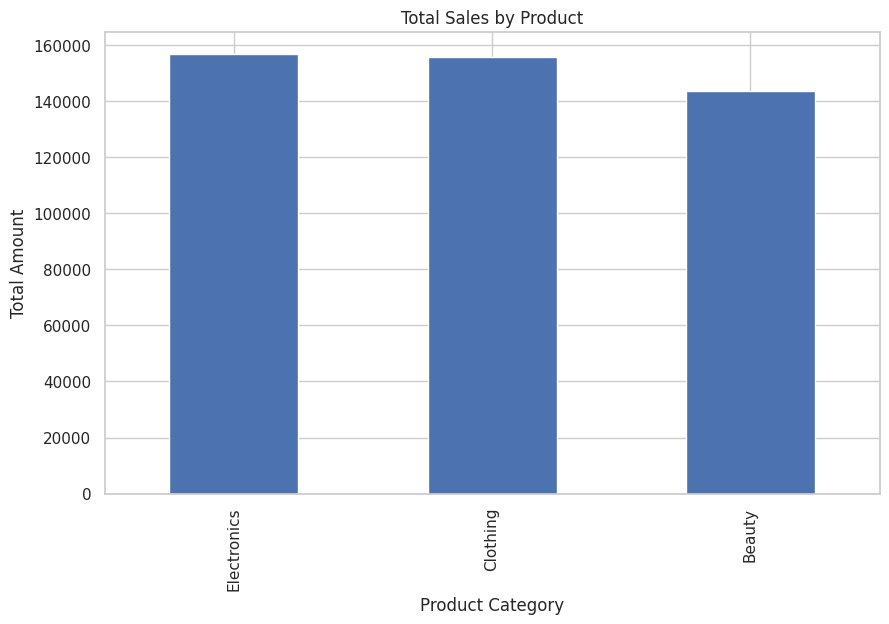

In [ ]:
# Total sales by product
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

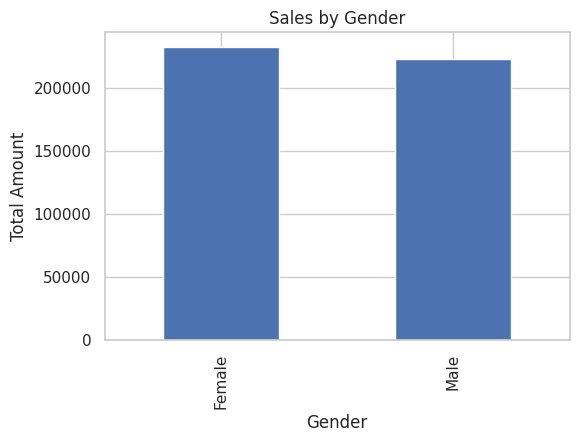

In [ ]:
# Sales by customer gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6,4))
gender_sales.plot(kind='bar')
plt.title('Sales by Gender')
plt.ylabel('Total Amount')
plt.show()


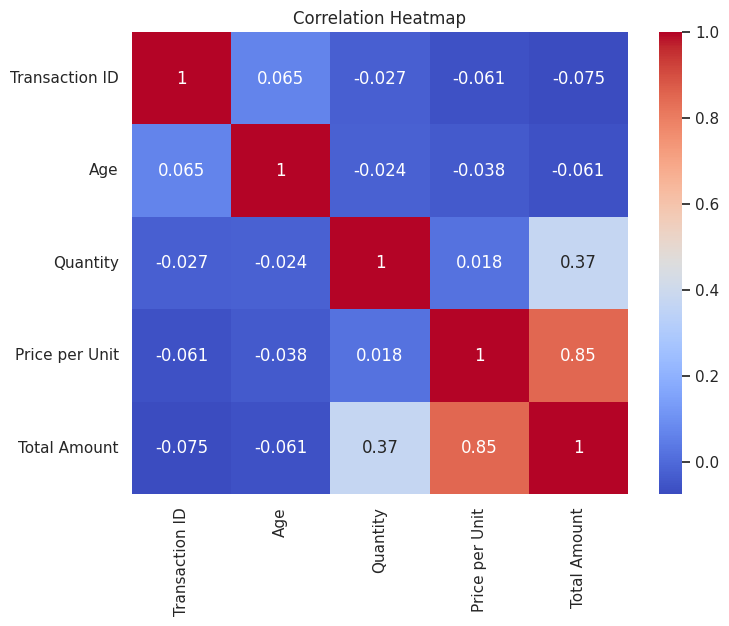

In [ ]:
# Correlation matrix
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print("Key Insights:")
print("- Identify peak sales periods from the time series plot.")
print("- Determine top-selling products.")
print("- Understand which customer segments generate higher revenue.")
print("\nRecommendations:")
print("- Increase inventory for top products.")
print("- Run promotions during low-sales periods.")
print("- Target high-value customer groups.")


Key Insights:
- Identify peak sales periods from the time series plot.
- Determine top-selling products.
- Understand which customer segments generate higher revenue.

Recommendations:
- Increase inventory for top products.
- Run promotions during low-sales periods.
- Target high-value customer groups.
